# 0. Importar bibliotecas necesarias


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# 1. Variables de entorno



*   dt = 0.1  # Paso de tiempo en la simulación.
*   t_max = 100  # Duración total de la simulación en milisegundos.
* t = np.arange(0, t_max, dt)  # Espacio de tiempo para la simulación.



In [2]:
dt = 0.1
t_max = 100
t = np.arange(0, t_max, dt)

# Generación de Espigas (Impulsos de Acción)



*   spike_times: Generacion de espigas en tiempos aleatorios
*   x1: Trenes de espigas
*   sigma: Desviación estandar del núcleo Gaussiano
*   gaussian_kernel: Creación del Núcleo Gaussiano
*   v1: Convolución del trene de espigas de N1 con el Núcleo Gaussiano



In [3]:
spike_times_N1 = np.random.uniform(0, t_max, size=40)

x1 = np.zeros_like(t)
x2 = np.zeros_like(t)

x1 = np.zeros_like(t)
spike_indices_N1 = (spike_times_N1 / dt).astype(int)
x1[spike_indices_N1] = 1
sigma = 2

gaussian_kernel = np.exp(-0.5 * ((np.arange(-5 * sigma, 5 * sigma, dt)) / sigma) ** 2)
gaussian_kernel /= gaussian_kernel.sum()

v1 = convolve(x1, gaussian_kernel, mode='same') * dt

# 2. Inicialización de variables para el Aprendizaje de Hebb



*   alpha = 0.1 Tasa de decaimiento
*   beta = 3000 Tasa de potenciación
*   w = 0.5 Partimos de la base de que w vale 0.5


In [4]:
alpha = 0.1
beta = 3000
w = np.zeros_like(t) + 0.5

## Inicialización del tren de impulsos y el potencial de membrana de N2.

- Motivados por los impulsos generados por N1.
- Los cambios generados en N2 con respecto a N1 influyen en el comportamiento de $w$.

In [5]:
v2 = np.zeros_like(t)
sigma_new = 4
x2 = np.zeros_like(t)
threshold = 0.08

for i in range(1, len(t)-1):
    dv2_dt = -v2[i-1] + w[i-1] * x1[i]
    v2[i] = v2[i-1] + dv2_dt * dt
    if v2[i] >= threshold:
        v2[i+1] = 0
        x2[i] = 1
    dw_dt = -alpha * w[i-1] + beta * (1 - w[i-1]) * v1[i] * v2[i]
    w[i] = w[i-1] + dw_dt * dt


#Suavizado por convolución del potencial de V2
gaussian_kernel_new = np.exp(-0.5 * ((np.arange(-5 * sigma_new, 5 * sigma_new, dt)) / sigma_new) ** 2)
gaussian_kernel_new /= gaussian_kernel_new.sum()

v2_smoothed = convolve(v2, gaussian_kernel_new, mode='same') * dt

# 3. Visualización de los resultados


<ipython-input-6-f6fab5ad89b3>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, x1, basefmt="r", linefmt="r-", markerfmt="ro", use_line_collection=False)
<ipython-input-6-f6fab5ad89b3>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, x2, basefmt="g", linefmt="g-", markerfmt="go", use_line_collection=False)


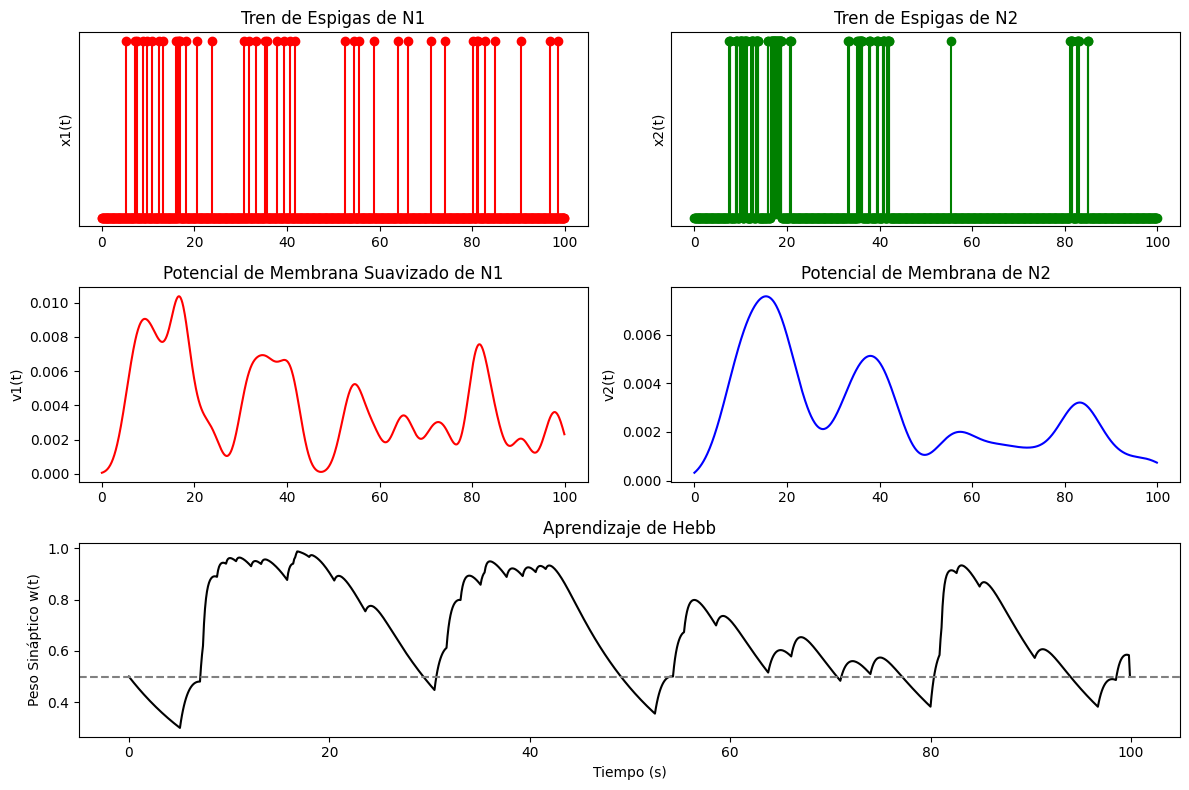

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.stem(t, x1, basefmt="r", linefmt="r-", markerfmt="ro", use_line_collection=False)
plt.ylabel('x1(t)')
plt.yticks([])
plt.title('Tren de Espigas de N1')

plt.subplot(3, 2, 2)
plt.stem(t, x2, basefmt="g", linefmt="g-", markerfmt="go", use_line_collection=False)
plt.ylabel('x2(t)')
plt.yticks([])
plt.title('Tren de Espigas de N2')

plt.subplot(3, 2, 3)
plt.plot(t, v1, 'r')
plt.ylabel('v1(t)')
plt.title('Potencial de Membrana de N1')

plt.subplot(3, 2, 4)
plt.plot(t, v2_smoothed, 'b')

plt.ylabel('v2(t)')
plt.title('Potencial de Membrana de N2')

plt.subplot(3, 1, 3)
plt.plot(t, w, 'k')
plt.axhline(0.5, color='gray', linestyle='--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Peso Sináptico w(t)')
plt.title('Aprendizaje de Hebb')

plt.tight_layout()
plt.show()